# Other Classification Exercise - KNN

### <font color='red'>1) Import related libs and Load datasets 

In [42]:
# import all required libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from IPython.display import display, Markdown
from sklearn.neighbors import KNeighborsClassifier


%matplotlib inline

In [43]:
df_wine = pd.read_csv('winequality-red.csv')
df_wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### <font color='red'>2) Data Analysis

In [44]:
df_wine.describe()
# no null values

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [45]:
df_wine.info()
# all values are float so we are good to go

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


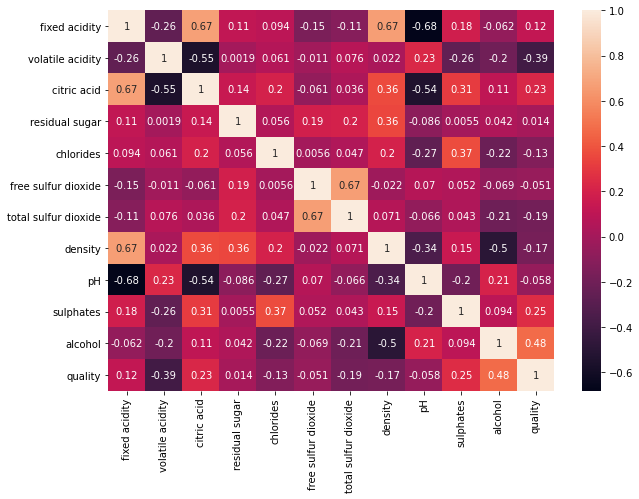

In [46]:
plt.figure(figsize=(10,7))
sns.heatmap(df_wine.corr(),annot=True)

#### <font color='green'> Observations:
* The relation between fixed acidity and density as well as fixed acidity and citric acid is significant, so one of them should be dropped
    

### <font color='red'>3) Split the data

In [47]:
X = df_wine.iloc[:,:-1]
y = df_wine.quality

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [48]:
model = KNeighborsClassifier()

In [49]:
model.fit(X_train,y_train)

KNeighborsClassifier()

### <font color='red'>4) Model Validation

In [50]:
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.4675


In [51]:
for k in range(1,50,2):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    ac = accuracy_score(y_test, model.predict(X_test))
    print(k," - ",ac)


1  -  0.515
3  -  0.44
5  -  0.4675
7  -  0.475
9  -  0.4725
11  -  0.46
13  -  0.4575
15  -  0.4675
17  -  0.48
19  -  0.485
21  -  0.495
23  -  0.4975
25  -  0.5075
27  -  0.5025
29  -  0.4925
31  -  0.495
33  -  0.5
35  -  0.505
37  -  0.5025
39  -  0.51
41  -  0.5175
43  -  0.5
45  -  0.5025
47  -  0.5275
49  -  0.5175


In [52]:
confusion_matrix(y_test, y_pred)

array([[  0,   0,   1,   0,   0,   0],
       [  0,   0,   6,   6,   1,   0],
       [  0,   1, 105,  53,   5,   0],
       [  0,   1,  84,  75,   9,   0],
       [  0,   0,  16,  24,   7,   1],
       [  0,   0,   1,   3,   1,   0]], dtype=int64)

### <font color='red'>5) Experimenting

In [53]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


C:\Users\65909\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


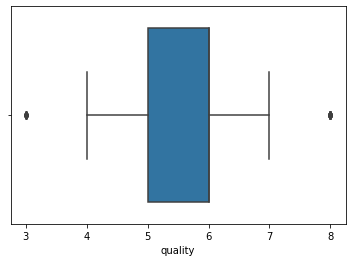

In [54]:
sns.boxplot(df_wine.quality)

#### <font color='green'>Observation
* the Box plot shows that the class 3 and class 8 is actually outliers
* most of the wine quality falls under class 5 and 6.
* perhaps can classify the wine in two classes. 
    * Class 0 --> below or equal to 5
    * Class 1 --> Above 5

In [55]:
def func(n):
    if (n <= 5):
        return 0
    else:
        return 1

In [56]:
df_wine['quality'] = df_wine['quality'].apply(lambda x: func(x))

In [57]:
# data set with new target column
# which has been engineered to have only two classes
df_wine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0


### <font color='red'>5.2) Split the data

In [58]:
X = df_wine.iloc[:,:-1]
y = df_wine.quality

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [59]:
# try to scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [60]:
for k in range(1,50,2):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train_scaled, y_train)
    ac = accuracy_score(y_test, model.predict(X_test_scaled))
    print(k,' -',ac)
    #print(ac)

1  - 0.7375
3  - 0.7125
5  - 0.7025
7  - 0.6875
9  - 0.715
11  - 0.715
13  - 0.7175
15  - 0.7125
17  - 0.72
19  - 0.7125
21  - 0.7025
23  - 0.7075
25  - 0.7
27  - 0.7075
29  - 0.71
31  - 0.7075
33  - 0.7075
35  - 0.6975
37  - 0.7075
39  - 0.7075
41  - 0.7
43  - 0.7075
45  - 0.7025
47  - 0.705
49  - 0.7175


#### <font color='green'> Observation:
* looks like k = 10 is good enough

In [61]:
model = KNeighborsClassifier(n_neighbors = 10)
model.fit(X_train_scaled, y_train)
accuracy_score_model = accuracy_score(y_test, model.predict(X_test_scaled))
print(accuracy_score_model)

0.725


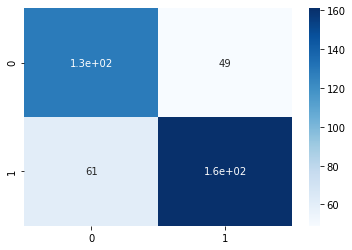

In [62]:
y_pred=model.predict(X_test_scaled)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues')

In [63]:
confusion_matrix(y_test,y_pred)

array([[129,  49],
       [ 61, 161]], dtype=int64)

### <center> -------------------------- END OF THE NOTEBOOK --------------------------